In [ ]:
%pylab

In [ ]:
%matplotlib inline

In [17]:
import functions
import algorithms 
from optSolver_Woo_Seonho import optSolver_Woo_Seonho
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [18]:
import numpy as np
## The correct way to call a certain function in functions.py is as follows
x0 = np.array([1.2,1.2])
functions.rosen_func(x0)

5.8

In [19]:
## Define three class objects required in 'optSolver' and their attributes 

class Problem:
    def __init__(self,name,x0,n,compute_f,compute_g,compute_H):
        self.name = name
        self.x0 = x0
        self.n = n
        self.compute_f = compute_f
        self.compute_g = compute_g
        self.compute_H = compute_H
        
class Method:
    def __init__(self,name,step_type,constant_step_size):
        self.name = name
        self.step_type = step_type
        self.constant_step_size = constant_step_size
        
class Options:
    def __init__(self,term_tol = 1e-6, max_iterations = 1e2):
        self.term_tol = term_tol
        self.max_iterations = max_iterations  

In [20]:
import scipy.io as sio
filepath = r'/Users/clairewoo/Desktop/IOE 511/Data/'
data2 = sio.loadmat(filepath + "quadratic2.mat")
data10 = sio.loadmat(filepath + "quadratic10.mat")

In [21]:
x0_quad2 = data2['x_0']
xstar_quad2 = data2['x_star']
x0_quad10 = data10['x_0']
xstar_quad10 = data10['x_star']

In [22]:
fstar_quad2 = functions.quad_func(xstar_quad2)[0][0]
fstar_quad10 = functions.quad_func(xstar_quad10)[0][0]

In [23]:
x_star = np.array([[1],[1]])
np.shape(x_star)

(2, 1)

## 1) GD - constant

In [24]:
import pylab
pylab.show()

### i. Quadratic - 2

In [58]:
problem_gdc_q2 = Problem('Quadratic', x0_quad2, len(x0_quad2), functions.quad_func, functions.quad_grad, functions.quad_hess)
method_gdc_q2 = Method('GradientDescent', 'Constant', 1e-3)
options = Options(1e-6,1e2) # if using options = Options(), term_tol and max_iterations will set to be default values

In [65]:
x, f, history_gdc_q2 = optSolver_Woo_Seonho(problem_gdc_q2,method_gdc_q2,options)

In [66]:
# Test with different constant
method_test1_1 = Method('GradientDescent', 'Constant', 5.0*1e-3)
method_test2_1 = Method('GradientDescent', 'Constant', 7.5*1e-3)
method_test3_1 = Method('GradientDescent', 'Constant', 1e-2)

x, f, history_test1_1 = optSolver_Woo_Seonho(problem_gdc_q2,method_test1_1,options)
x, f, history_test2_1 = optSolver_Woo_Seonho(problem_gdc_q2,method_test2_1,options)
x, f, history_test3_1 = optSolver_Woo_Seonho(problem_gdc_q2,method_test3_1,options)

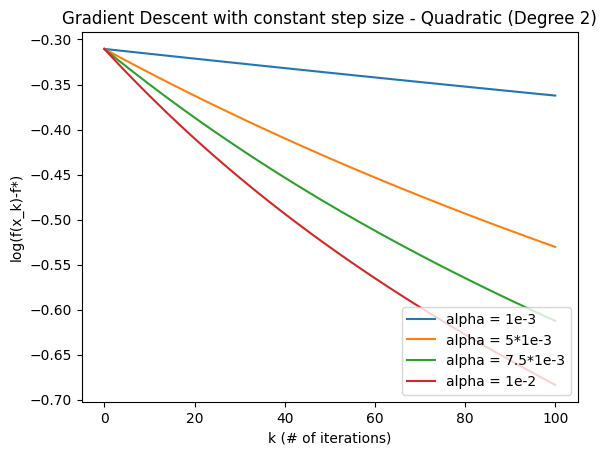

In [68]:
history_gdc_q2 = np.squeeze(history_gdc_q2); history_test1_1 = np.squeeze(history_test1_1); history_test2_1 = np.squeeze(history_test2_1); history_test3_1 = np.squeeze(history_test3_1)

log_diff_gdc_q2 = list(np.log(history_gdc_q2 - fstar_quad2))
log_diff_test1_1 = list(np.log(history_test1_1 - fstar_quad2))
log_diff_test2_1 = list(np.log(history_test2_1 - fstar_quad2))
log_diff_test3_1 = list(np.log(history_test3_1 - fstar_quad2))

x = list(np.arange(0, 101))
plt.plot(x, log_diff_gdc_q2, label = "alpha = 1e-3")
plt.plot(x, log_diff_test1_1, label = "alpha = 5*1e-3")
plt.plot(x, log_diff_test2_1, label = "alpha = 7.5*1e-3")
plt.plot(x, log_diff_test3_1, label = "alpha = 1e-2")
plt.xlabel('k (# of iterations)')
plt.ylabel('log(f(x_k)-f*)')
plt.title('Gradient Descent with constant step size - Quadratic (Degree 2)')
plt.legend(loc = "lower right")
plt.show()

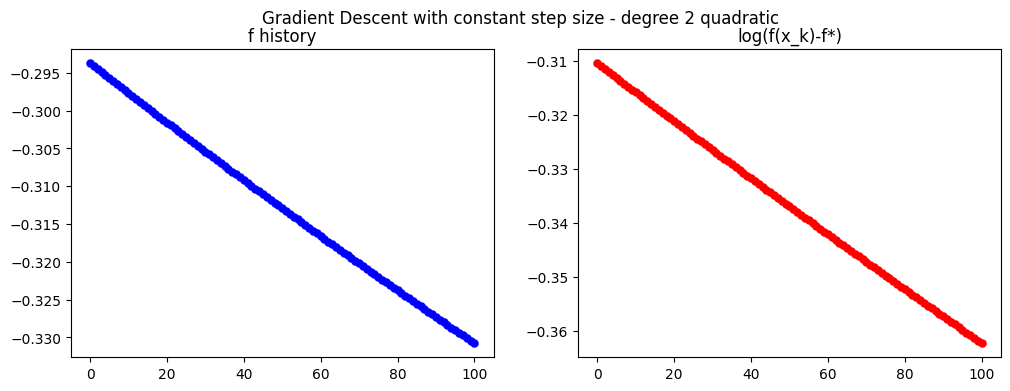

In [28]:
#plt.plot(history_1d)
#plt.plot(log_diff)

x = list(np.arange(0, len(history_gdc_q2)))
fig, ax = plt.subplots(1, 2)
fig.suptitle('Gradient Descent with constant step size - degree 2 quadratic')
ax[0].scatter(x, history_gdc_q2, color='b', linewidths=0.1)
ax[1].scatter(x, log_diff_gdc_q2,  color='r', linewidths = 0.1)
ax[0].set_title('f history')
ax[1].set_title('log(f(x_k)-f*)')
fig.set_size_inches(12, 4)
plt.show()

### ii. Quadratic - 10

In [69]:
problem_gdc_q10 = Problem('Quadratic', x0_quad10, len(x0_quad10), functions.quad_func, functions.quad_grad, functions.quad_hess)
method_gdc_q10 = Method('GradientDescent', 'Constant', 1e-3)
options = Options(1e-6,1e2) # if using options = Options(), term_tol and max_iterations will set to be default values

In [70]:
x, f, history_gdc_q10 = optSolver_Woo_Seonho(problem_gdc_q10, method_gdc_q10, options)

In [74]:
# Test with different constant
method_test1_2 = Method('GradientDescent', 'Constant', 5.0*1e-3)
method_test2_2 = Method('GradientDescent', 'Constant', 7.5*1e-3)
method_test3_2 = Method('GradientDescent', 'Constant', 1e-2)

x, f, history_test1_2 = optSolver_Woo_Seonho(problem_gdc_q10,method_test1_2,options)
x, f, history_test2_2 = optSolver_Woo_Seonho(problem_gdc_q10,method_test2_2,options)
x, f, history_test3_2 = optSolver_Woo_Seonho(problem_gdc_q10,method_test3_2,options)

In [75]:
history_gdc_q10 = np.squeeze(history_gdc_q10)

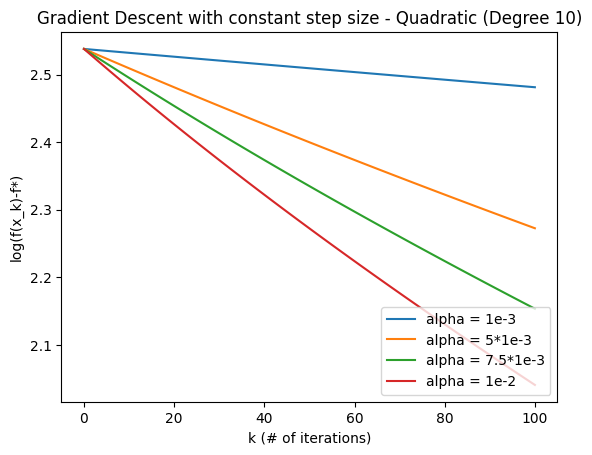

In [76]:
history_gdc_q10 = np.squeeze(history_gdc_q10); history_test1_2 = np.squeeze(history_test1_2); history_test2_2 = np.squeeze(history_test2_2); history_test3_2 = np.squeeze(history_test3_2)

log_diff_gdc_q10 = list(np.log(history_gdc_q10 - fstar_quad10))
log_diff_test1_2 = list(np.log(history_test1_2 - fstar_quad10))
log_diff_test2_2 = list(np.log(history_test2_2 - fstar_quad10))
log_diff_test3_2 = list(np.log(history_test3_2 - fstar_quad10))

x = list(np.arange(0, 101))
plt.plot(x, log_diff_gdc_q10, label = "alpha = 1e-3")
plt.plot(x, log_diff_test1_2, label = "alpha = 5*1e-3")
plt.plot(x, log_diff_test2_2, label = "alpha = 7.5*1e-3")
plt.plot(x, log_diff_test3_2, label = "alpha = 1e-2")
plt.xlabel('k (# of iterations)')
plt.ylabel('log(f(x_k)-f*)')
plt.title('Gradient Descent with constant step size - Quadratic (Degree 10)')
plt.legend(loc = "lower right")
plt.show()

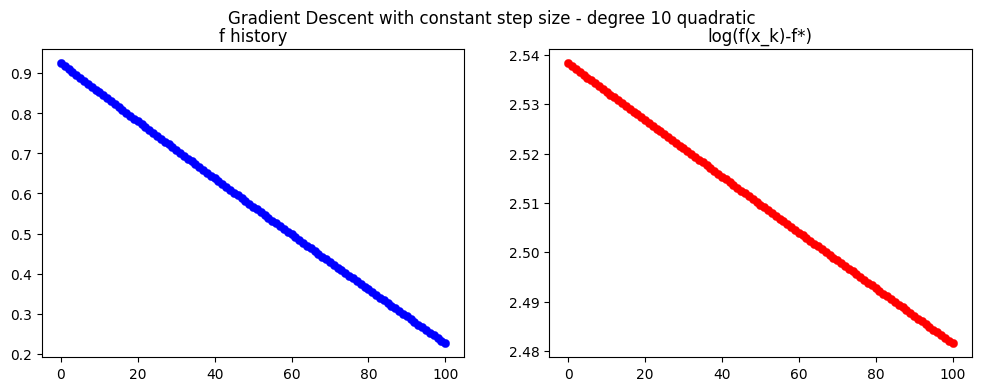

In [32]:
#plt.plot(history_1d)
#plt.plot(log_diff)

x = list(np.arange(0, len(history_gdc_q10)))
fig, ax = plt.subplots(1, 2)
fig.suptitle('Gradient Descent with constant step size - degree 10 quadratic')
ax[0].scatter(x, history_gdc_q10, color='b', linewidths=0.25)
ax[1].scatter(x, log_diff_gdc_q10,  color='r', linewidths = 0.25)
ax[0].set_title('f history')
ax[1].set_title('log(f(x_k)-f*)')
fig.set_size_inches(12, 4)
plt.show()

### iii. Rosenbrock's

In [77]:
## The correct way to instantiate an object in the class is as follow:
x0 = np.array([1.2,1.2])
problem_gdc_r = Problem('Rosenbrock',x0,len(x0), functions.rosen_func, functions.rosen_grad, functions.rosen_Hess)
method_gdc_r = Method('GradientDescent', 'Constant', 1e-3)
options = Options(1e-6,1e2) # if using options = Options(), term_tol and max_iterations will set to be default values

In [81]:
## Implement the algorithm on a problem 
x, f, history_gdc_r = optSolver_Woo_Seonho(problem_gdc_r,method_gdc_r,options)

In [82]:
# Test with different constant
method_test1_3 = Method('GradientDescent', 'Constant', 5.0*1e-3)
method_test2_3 = Method('GradientDescent', 'Constant', 7.5*1e-3)
method_test3_3 = Method('GradientDescent', 'Constant', 1e-2)

x, f, history_test1_3 = optSolver_Woo_Seonho(problem_gdc_r,method_test1_3,options)
x, f, history_test2_3 = optSolver_Woo_Seonho(problem_gdc_r,method_test2_3,options)
x, f, history_test3_3 = optSolver_Woo_Seonho(problem_gdc_r,method_test3_3,options)

In [96]:
np.squeeze(functions.rosen_func(x_star))
np.shape(history_gdc_r), np.shape(history_test1_3), np.shape(history_test2_3), np.shape(history_test3_3)

((101,), (10,), (10,), (11,))

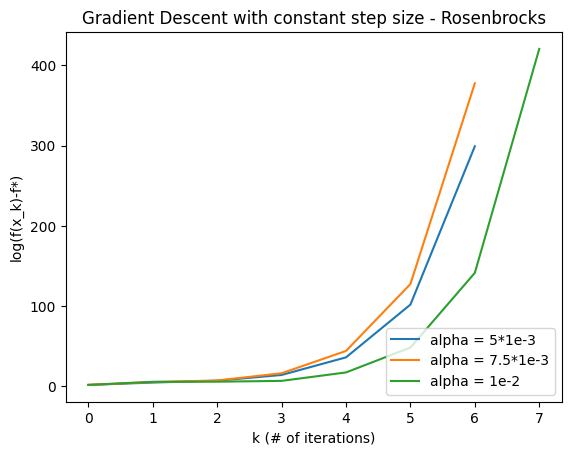

In [97]:
#history_gdc_r = np.squeeze(history_gdc_r); history_test1_3 = np.squeeze(history_test1_3); history_test2_3 = np.squeeze(history_test2_3); history_test3_3 = np.squeeze(history_test3_3)

#log_diff_gdc_r = list(np.log(history_gdc_r - functions.rosen_func(x_star)))
log_diff_test1_3 = list(np.log(history_test1_3 - functions.rosen_func(x_star)))
log_diff_test2_3 = list(np.log(history_test2_3 - functions.rosen_func(x_star)))
log_diff_test3_3 = list(np.log(history_test3_3[:-1] - functions.rosen_func(x_star)))

x = list(np.arange(0, len(log_diff_test1_3)))
#plt.plot(x, log_diff_gdc_r, label = "alpha = 1e-3")
plt.plot(x, log_diff_test1_3, label = "alpha = 5*1e-3")
plt.plot(x, log_diff_test2_3, label = "alpha = 7.5*1e-3")
plt.plot(x, log_diff_test3_3, label = "alpha = 1e-2")
plt.xlabel('k (# of iterations)')
plt.ylabel('log(f(x_k)-f*)')
plt.title('Gradient Descent with constant step size - Rosenbrocks')
plt.legend(loc = "lower right")
plt.show()

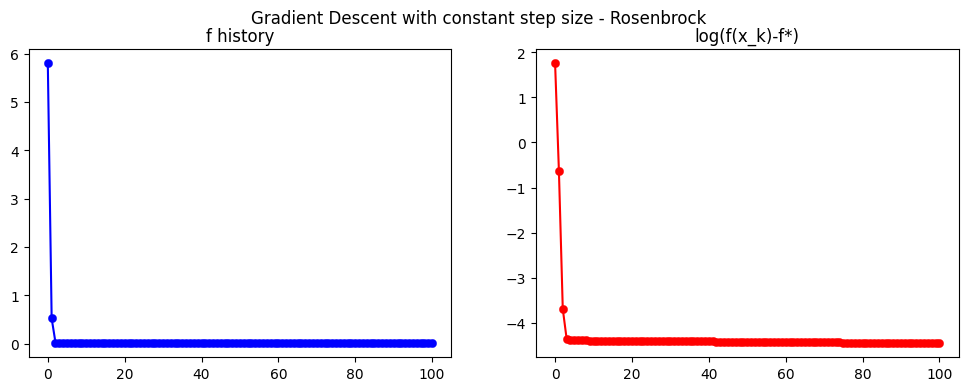

In [35]:
#plt.plot(history_1d)
#plt.plot(log_diff)

x = list(np.arange(0, len(history_gdc_r)))
fig, ax = plt.subplots(1, 2)
fig.suptitle('Gradient Descent with constant step size - Rosenbrock')
ax[0].scatter(x, history_gdc_r, color='b', linewidths=0.25)
ax[0].plot(x, history_gdc_r, color = 'blue')
ax[1].scatter(x, log_diff_gdc_r,  color='r', linewidths = 0.25)
ax[1].plot(x, log_diff_gdc_r, color = 'red')
ax[0].set_title('f history')
ax[1].set_title('log(f(x_k)-f*)')
fig.set_size_inches(12, 4)
plt.show()

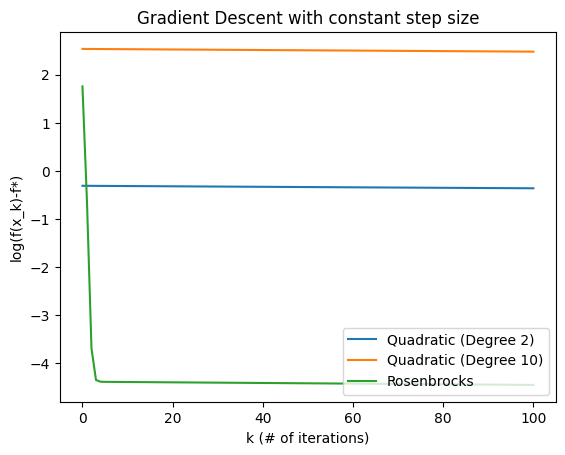

In [36]:
'''
fig, (ax1, ax2, ax3) = plt.subplots(2, 2)
fig.suptitle('Gradient Descent with constant step size')
ax1.scatter(x, log_diff_gdc_q2,  color='r', linewidths = 0.25)
ax1.plot(x, log_diff_gdc_q2, color = 'red', label = "Quadratic (Degree 2)")
ax2.scatter(x, log_diff_gdc_q10,  color='g', linewidths = 0.25)
ax2.plot(x, log_diff_gdc_q10, color = 'green', label = "Quadratic (Degree 10)")
ax3.scatter(x, log_diff_gdc_r,  color='b', linewidths = 0.25)
ax3.plot(x, log_diff_gdc_r, color = 'blue', label = "Rosenbrocks")
ax.set_ylabel('log(f(x_k)-f*)')
plt.legend()
fig.set_size_inches(16, 6)
plt.show()
'''

x = list(np.arange(0, 101))
plt.plot(x, log_diff_gdc_q2, label = "Quadratic (Degree 2)")
plt.plot(x, log_diff_gdc_q10, label = "Quadratic (Degree 10)")
plt.plot(x, log_diff_gdc_r, label = "Rosenbrocks")
plt.xlabel('k (# of iterations)')
plt.ylabel('log(f(x_k)-f*)')
plt.title('Gradient Descent with constant step size')
plt.legend(loc = "lower right")
plt.show()

## 2) GD - backtracking line search

### i. Quadratic - 2

In [37]:
problem_gdb_q2 = Problem('Quadratic', x0_quad2, len(x0_quad2), functions.quad_func, functions.quad_grad, functions.quad_hess)
method_gdb_q2 = Method('GradientDescent', 'Backtracking', 1e-3)
options = Options(1e-6,1e2) # if using options = Options(), term_tol and max_iterations will set to be default values

In [38]:
x, f, history_gdb_q2 = optSolver_Woo_Seonho(problem_gdb_q2,method_gdb_q2,options)

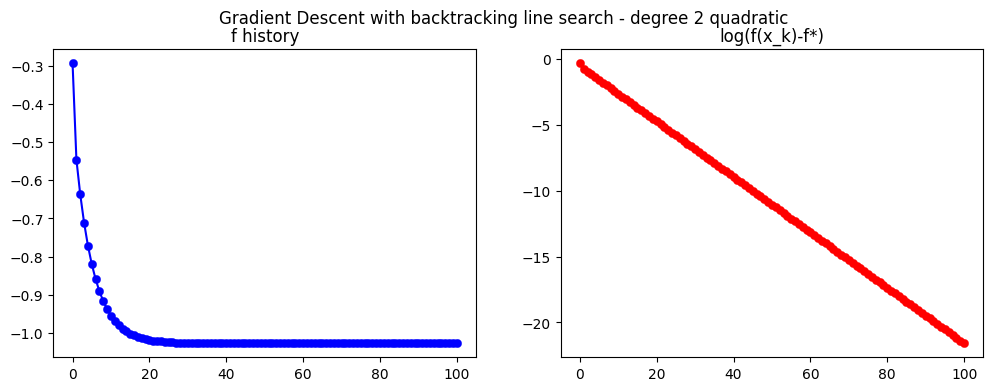

In [39]:
history_gdb_q2 = np.squeeze(history_gdb_q2)
#np.shape(history_gdb_q2)
log_diff_gdb_q2 = list(np.log(history_gdb_q2 - fstar_quad2))

x = list(np.arange(0, len(history_gdb_q2)))
fig, ax = plt.subplots(1, 2)
fig.suptitle('Gradient Descent with backtracking line search - degree 2 quadratic')
ax[0].scatter(x, history_gdb_q2, color='b', linewidths=0.25)
ax[0].plot(x, history_gdb_q2, color='blue')
ax[1].scatter(x, log_diff_gdb_q2,  color='r', linewidths = 0.25)
ax[0].set_title('f history')
ax[1].set_title('log(f(x_k)-f*)')
fig.set_size_inches(12, 4)
plt.show()

### ii. Quadratic - 10

In [40]:
problem_gdb_q10 = Problem('Quadratic', x0_quad10, len(x0_quad10), functions.quad_func, functions.quad_grad, functions.quad_hess)
method_gdb_q10 = Method('GradientDescent', 'Backtracking', 1e-3)
options = Options(1e-6,1e2) # if using options = Options(), term_tol and max_iterations will set to be default values

In [41]:
x, f, history_gdb_q10 = optSolver_Woo_Seonho(problem_gdb_q10, method_gdb_q10, options)

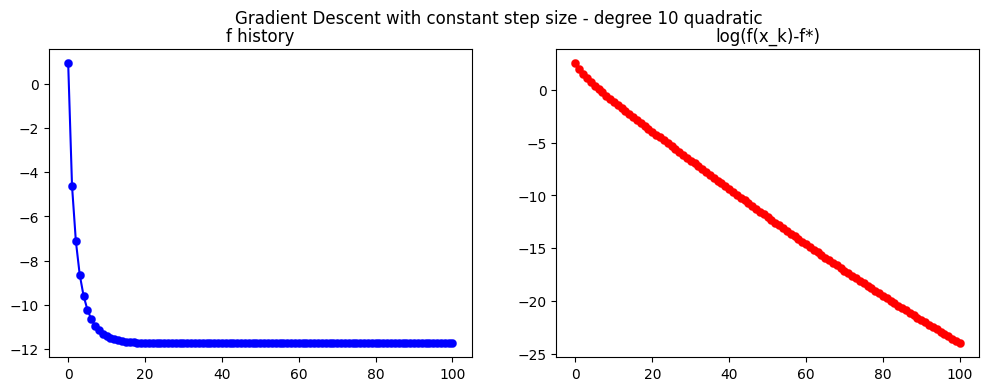

In [42]:
history_gdb_q10 = np.squeeze(history_gdb_q10)
np.shape(history_gdb_q10)
log_diff_gdb_q10 = list(np.log(history_gdb_q10 - fstar_quad10))


x = list(np.arange(0, len(history_gdb_q10)))
fig, ax = plt.subplots(1, 2)
fig.suptitle('Gradient Descent with constant step size - degree 10 quadratic')
ax[0].scatter(x, history_gdb_q10, color='b', linewidths=0.15)
ax[0].plot(x, history_gdb_q10, color='blue')
ax[1].scatter(x, log_diff_gdb_q10,  color='r', linewidths = 0.15)
ax[0].set_title('f history')
ax[1].set_title('log(f(x_k)-f*)')
fig.set_size_inches(12, 4)
plt.show()

### iii. Rosenbrock's

In [98]:
x0 = np.array([1.2,1.2])
problem_gdb_r = Problem('Rosenbrock',x0,len(x0), functions.rosen_func, functions.rosen_grad, functions.rosen_Hess)
method_gdb_r = Method('GradientDescent', 'Backtracking', 1e-3)
options = Options(1e-6,1e2) # if using options = Options(), term_tol and max_iterations will set to be default values

In [99]:
x1 = np.array([-0.001, -0.001]); x2 = np.array([0.99, 0.99]); x3 = np.array([-1.2, 1])
prob_r1 = Problem('Rosenbrock',x1,len(x1), functions.rosen_func, functions.rosen_grad, functions.rosen_Hess)
prob_r2 = Problem('Rosenbrock',x2,len(x2), functions.rosen_func, functions.rosen_grad, functions.rosen_Hess)
prob_r3 = Problem('Rosenbrock',x3,len(x3), functions.rosen_func, functions.rosen_grad, functions.rosen_Hess)

In [45]:
x, f, history_gdb_r = optSolver_Woo_Seonho(problem_gdb_r, method_gdb_r, options)
x_r1, f1, history_gdb_r1 = optSolver_Woo_Seonho(prob_r1, method_gdb_r, options)
x_r2, f2, history_gdb_r2 = optSolver_Woo_Seonho(prob_r2, method_gdb_r, options)
x_r3, f3, history_gdb_r3 = optSolver_Woo_Seonho(prob_r3, method_gdb_r, options)

log_diff_gdb_r = list(np.log(history_gdb_r - functions.rosen_func(x_star)))
log_diff_gdb_r1 = list(np.log(history_gdb_r1 - functions.rosen_func(x_star)))
log_diff_gdb_r2 = list(np.log(history_gdb_r2 - functions.rosen_func(x_star)))
log_diff_gdb_r3 = list(np.log(history_gdb_r3 - functions.rosen_func(x_star)))

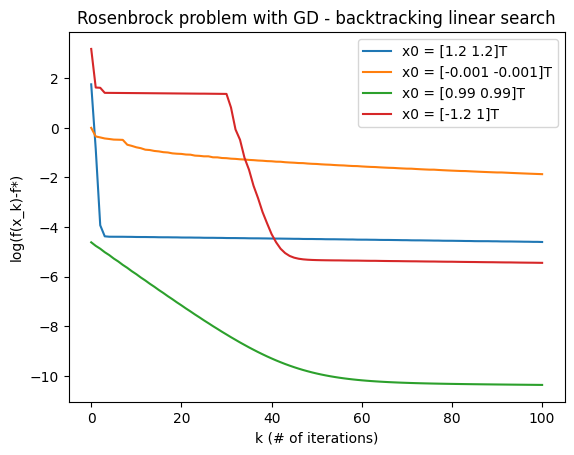

In [46]:
x = list(np.arange(0, 101))
plt.plot(x, log_diff_gdb_r, label = "x0 = [1.2 1.2]T")
plt.plot(x, log_diff_gdb_r1, label = "x0 = [-0.001 -0.001]T")
plt.plot(x, log_diff_gdb_r2, label = "x0 = [0.99 0.99]T")
plt.plot(x, log_diff_gdb_r3, label = "x0 = [-1.2 1]T")
plt.xlabel('k (# of iterations)')
plt.ylabel('log(f(x_k)-f*)')
plt.title('Rosenbrock problem with GD - backtracking linear search')
plt.legend(loc = "upper right")
plt.show()

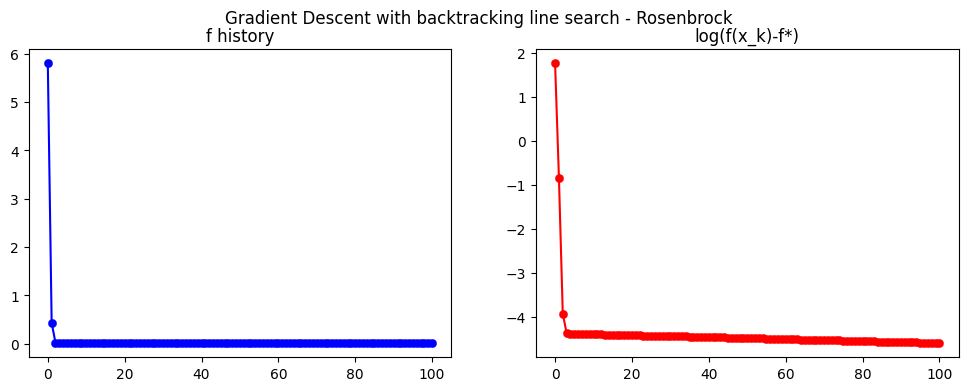

In [101]:
x = list(np.arange(0, len(history_gdb_r)))
fig, ax = plt.subplots(1, 2)
fig.suptitle('Gradient Descent with backtracking line search - Rosenbrock')
ax[0].scatter(x, history_gdb_r, color='b', linewidths=0.25)
ax[0].plot(x, history_gdb_r, color = 'blue')
ax[1].scatter(x, log_diff_gdb_r,  color='r', linewidths = 0.25)
ax[1].plot(x, log_diff_gdb_r, color = 'red')
ax[0].set_title('f history')
ax[1].set_title('log(f(x_k)-f*)')
fig.set_size_inches(12, 4)

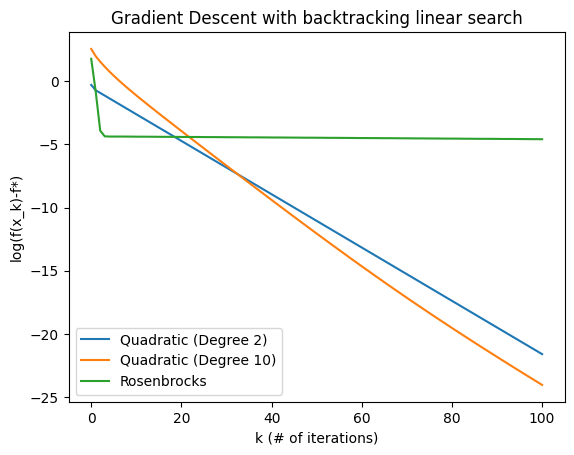

In [48]:
x = list(np.arange(0, 101))
plt.plot(x, log_diff_gdb_q2, label = "Quadratic (Degree 2)")
plt.plot(x, log_diff_gdb_q10, label = "Quadratic (Degree 10)")
plt.plot(x, log_diff_gdb_r, label = "Rosenbrocks")
plt.xlabel('k (# of iterations)')
plt.ylabel('log(f(x_k)-f*)')
plt.title('Gradient Descent with backtracking linear search')
plt.legend(loc = "lower left")
plt.show()

## 3) Newton's Method - backtracking line search

### i. Quadratic - 2

In [49]:
problem_new_q2 = Problem('Quadratic', x0_quad2, len(x0_quad2), functions.quad_func, functions.quad_grad, functions.quad_hess)
method_new_q2 = Method('Newton', 'Backtracking', 1e-3)
options = Options(1e-6,1e3) # if using options = Options(), term_tol and max_iterations will set to be default values

In [50]:
x, f, history_new_q2 = optSolver_Woo_Seonho(problem_new_q2, method_new_q2, options)

/var/folders/bv/zqk7m84d69b6xs23pmxy9w480000gn/T/ipykernel_9381/2114730223.py:3: RuntimeWarning: invalid value encountered in log
  log_diff_new_q2 = list(np.log(history_new_q2 - fstar_quad2))


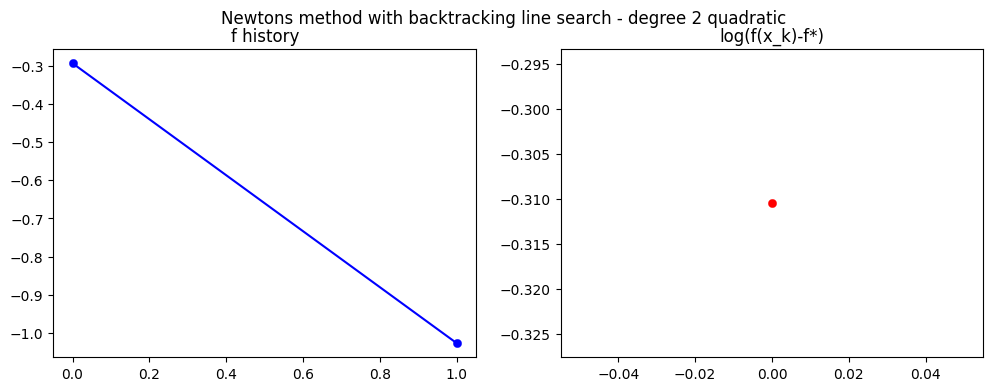

In [51]:
history_new_q2 = np.squeeze(history_new_q2)
#np.shape(history_new_q2)
log_diff_new_q2 = list(np.log(history_new_q2 - fstar_quad2))

x = list(np.arange(0, len(history_new_q2)))
fig, ax = plt.subplots(1, 2)
fig.suptitle('Newtons method with backtracking line search - degree 2 quadratic')
ax[0].scatter(x, history_new_q2, color='b', linewidths=0.25)
ax[0].plot(x, history_new_q2, color='blue')
ax[1].scatter(x, log_diff_new_q2 ,  color='r', linewidths = 0.25)
ax[0].set_title('f history')
ax[1].set_title('log(f(x_k)-f*)')
fig.set_size_inches(12, 4)
plt.show()

### ii. Quadratic - 10

In [52]:
problem_new_q10  = Problem('Quadratic', x0_quad10, len(x0_quad10), functions.quad_func, functions.quad_grad, functions.quad_hess)
method_new_q10 = Method('Newton', 'Backtracking', 1e-3)
options = Options(1e-6,1e2) # if using options = Options(), term_tol and max_iterations will set to be default values

In [53]:
x, f, history_new_q10 = optSolver_Woo_Seonho(problem_new_q10,method_new_q10,options)

/var/folders/bv/zqk7m84d69b6xs23pmxy9w480000gn/T/ipykernel_9381/2318131189.py:3: RuntimeWarning: invalid value encountered in log
  log_diff_new_q10 = list(np.log(history_new_q10 - fstar_quad10))


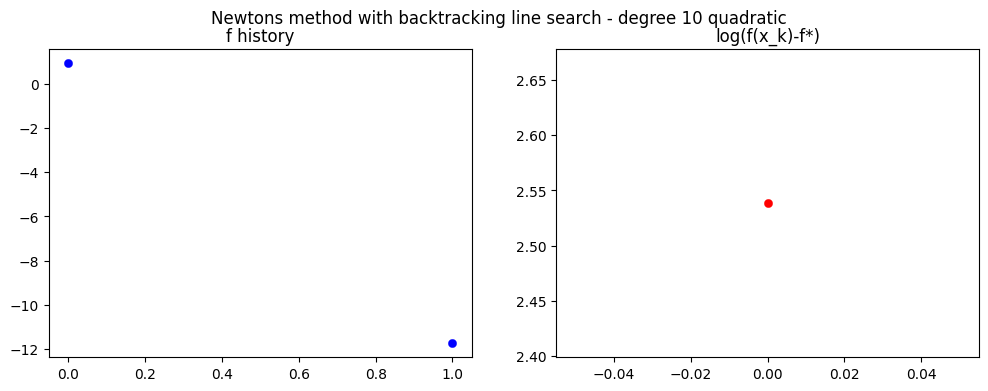

In [54]:
history_new_q10 = np.squeeze(history_new_q10)
np.shape(history_new_q10)
log_diff_new_q10 = list(np.log(history_new_q10 - fstar_quad10))

x = list(np.arange(0, len(history_new_q10)))
fig, ax = plt.subplots(1, 2)
fig.suptitle('Newtons method with backtracking line search - degree 10 quadratic')
ax[0].scatter(x, history_new_q10, color='b', linewidths=0.25)
ax[1].scatter(x, log_diff_new_q10,  color='r', linewidths = 0.25)
ax[0].set_title('f history')
ax[1].set_title('log(f(x_k)-f*)')
fig.set_size_inches(12, 4)
plt.show()

### iii. Rosenbrock's

In [55]:
x0 = np.array([1.2,1.2])
problem_new_r = Problem('Rosenbrock',x0,len(x0), functions.rosen_func, functions.rosen_grad, functions.rosen_Hess)
method_new_r = Method('Newton', 'Backtracking', 1e-3)
options = Options(1e-6,1e2) # if using options = Options(), term_tol and max_iterations will set to be default values

In [56]:
x, f, history_new_r = optSolver_Woo_Seonho(problem_new_r,method_new_r,options)

LinAlgError: Last 2 dimensions of the array must be square

In [ ]:
log_diff_new_r = list(np.log(history_new_r - functions.rosen_func(x_star)))

x = list(np.arange(0, len(history_new_r)))
fig, ax = plt.subplots(1, 2)
fig.suptitle('Newtons method with backtracking line search - Rosenbrock')
ax[0].scatter(x, history_new_r, color='b', linewidths=0.25)
ax[0].plot(x, history_new_r, color = 'blue')
ax[1].scatter(x, log_diff_new_r,  color='r', linewidths = 0.25)
ax[1].plot(x, log_diff_new_r, color = 'red')
ax[0].set_title('f history')
ax[1].set_title('log(f(x_k)-f*)')
fig.set_size_inches(12, 4)

NameError: name 'history_new_r' is not defined

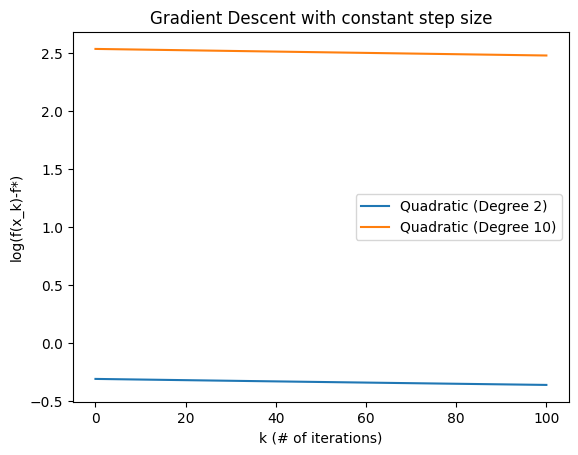

In [ ]:
x = list(np.arange(0, 101))
plt.plot(x, log_diff_gdc_q2, label = "Quadratic (Degree 2)")
plt.plot(x, log_diff_gdc_q10, label = "Quadratic (Degree 10)")
plt.plot(x, log_diff_gdc_q10, label = "Quadratic (Degree 10)")
plt.xlabel('k (# of iterations)')
plt.ylabel('log(f(x_k)-f*)')
plt.title('Gradient Descent with constant step size')
plt.legend(loc = "center right")
plt.show()

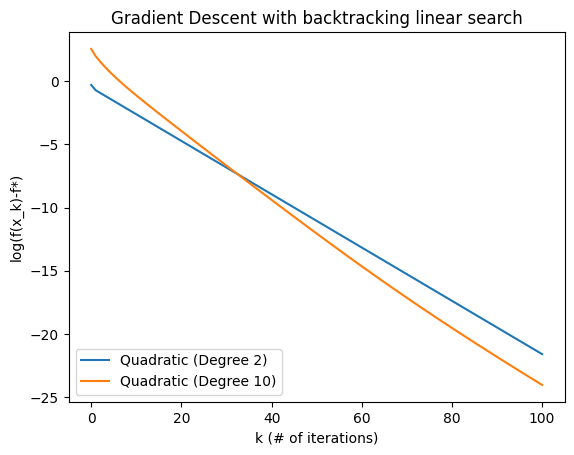

In [ ]:
plt.plot(x, log_diff_gdb_q2, label = "Quadratic (Degree 2)")
plt.plot(x, log_diff_gdb_q10, label = "Quadratic (Degree 10)")
plt.xlabel('k (# of iterations)')
plt.ylabel('log(f(x_k)-f*)')
plt.title('Gradient Descent with backtracking linear search')
plt.legend(loc = "lower left")
plt.show()

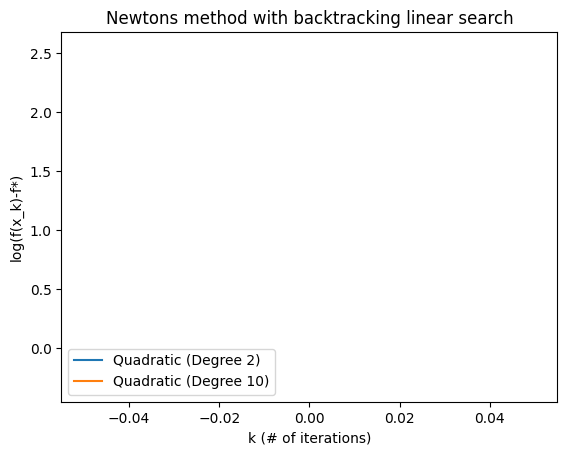

In [57]:
plt.plot(np.arange(0, len(log_diff_new_q2)), log_diff_new_q2, label = "Quadratic (Degree 2)")
plt.plot(np.arange(0, len(log_diff_new_q10)), log_diff_new_q10, label = "Quadratic (Degree 10)")
plt.xlabel('k (# of iterations)')
plt.ylabel('log(f(x_k)-f*)')
plt.title('Newtons method with backtracking linear search')
plt.legend(loc = "lower left")
plt.show()